In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [2]:
base_dir = '/content/drive/MyDrive/shot/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [3]:
BATCH_SIZE = 5
IMG_SIZE = (180, 180)

train = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 100 files belonging to 2 classes.


In [4]:
validation = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 30 files belonging to 2 classes.


In [5]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 4s 0us/step


In [6]:
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [7]:
resnet_model.compile(tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train, validation_data=validation, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 53s 2s/step - loss: 1.5697 - accuracy: 0.5500 - val_loss: 1.3129 - val_accuracy: 0.5667
Epoch 2/50
20/20 [==============================] - 18s 915ms/step - loss: 0.4530 - accuracy: 0.7600 - val_loss: 0.6192 - val_accuracy: 0.7333
Epoch 3/50
20/20 [==============================] - 16s 811ms/step - loss: 0.2244 - accuracy: 0.9300 - val_loss: 0.6149 - val_accuracy: 0.7000
Epoch 4/50
20/20 [==============================] - 16s 803ms/step - loss: 0.1274 - accuracy: 0.9800 - val_loss: 0.6881 - val_accuracy: 0.7000
Epoch 5/50
20/20 [==============================] - 16s 808ms/step - loss: 0.0642 - accuracy: 1.0000 - val_loss: 0.7548 - val_accuracy: 0.6667
Epoch 6/50
20/20 [==============================] - 16s 809ms/step - loss: 0.0418 - accuracy: 1.0000 - val_loss: 0.7951 - val_accuracy: 0.6667
Epoch 7/50
20/20 [==============================] - 18s 915ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.8847 - val_accuracy: 0.7333
Epoch 8/50
20

Text(0.5, 1.0, 'Training and Validation Accuracy (ResNet50)')

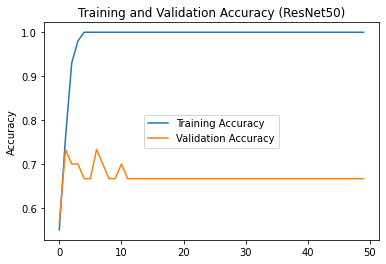

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (ResNet50)')

In [9]:
loss, accuracy = resnet_model.evaluate(validation)
print('Test accuracy :', accuracy)

6/6 [==============================] - 4s 614ms/step - loss: 1.4345 - accuracy: 0.6667
Test accuracy : 0.6666666865348816


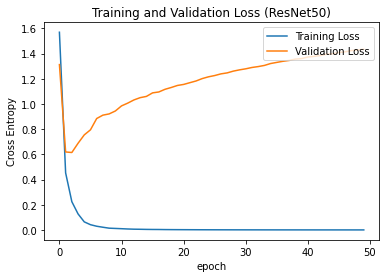

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss (ResNet50)')
plt.xlabel('epoch')
plt.show()